Data loaded successfully!
Shape: (499, 11)
Columns: ['address', 'isHostedBySuperhost', 'location/lat', 'location/lng', 'name', 'numberOfGuests', 'pricing/rate/amount', 'roomType', 'stars', 'City', 'State']

=== Hotel Chatbot ===
Choose 1-10 or ask for plots:
1. Show basic statistics
2. Top 10 hotels by stars
3. Average price by city
4. Room types count
5. Superhost prices
6. Stars vs price
7. Guests by room type
8. Hotels by city
9. Show price histogram
10. Exit



Your question:  Average price by city 'scatter'


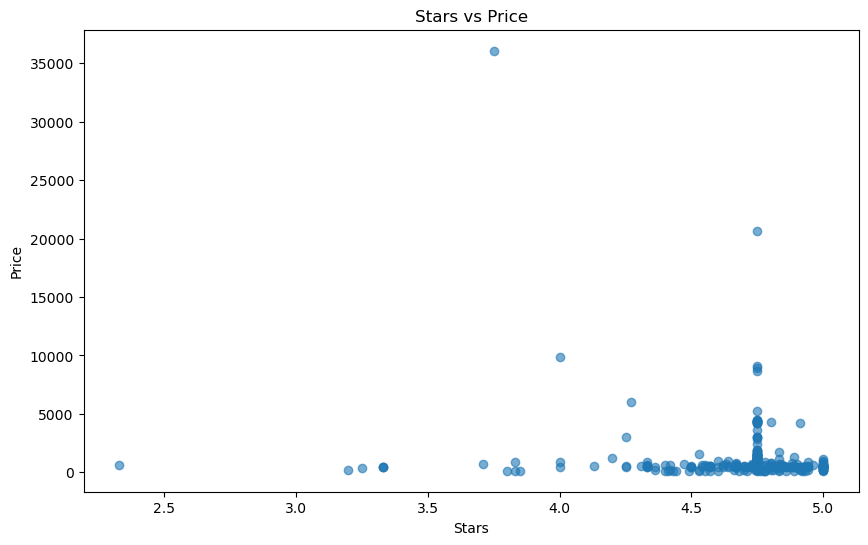


Your question:  Superhost prices


Type 1-10 or 'bar', 'hist', 'scatter'



Your question:  2



Top 10 Hotels:
                                              name  stars  pricing/rate/amount
  Escape to Paradise, Your Group Getaway 12-36 Pax    5.0                  978
Hamsa Villas, Candolim Beach, Goa (Casa Sea Vista)    5.0                 1143
Vedantha@33-Beach Front Pool Villa.ECR\n9884458888    5.0                  893
 Celebration: 6BHK Luxury Villa - Pool/Jaccuzi/Bar    5.0                  661
Falcon Hill -Infinity pool views near Lion's point    5.0                  624
      8BHK 60 ML Chalet (can accommodate 40 paxs*)    5.0                  519
                                Casa Pelo Mar, Goa    5.0                  704
Exquisite 9 Bedroom Family Style Mansion with Pool    5.0                  531
Beachgate Bungalows by CGH Earth, Fort Kochi Beach    5.0                  541
         Sunscape - Sea view 3bhk luxury apartment    5.0                  692



Your question:  5



Superhost Prices (0=No, 1=Yes):
isHostedBySuperhost
False    1009.35
True      550.32
Name: pricing/rate/amount, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
df = pd.read_csv('cleaned_air.csv')
print("Data loaded successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))

def hotel_chatbot():
    questions = [
        "1. Show basic statistics",
        "2. Top 10 hotels by stars", 
        "3. Average price by city",
        "4. Room types count",
        "5. Superhost prices",
        "6. Stars vs price",
        "7. Guests by room type",
        "8. Hotels by city",
        "9. Show price histogram",
        "10. Exit"
    ]
    
    print("\n=== Hotel Chatbot ===")
    print("Choose 1-10 or ask for plots:")
    for q in questions:
        print(q)
    
    while True:
        ask = input("\nYour question: ").lower().strip()
        
        if ask in ['10', 'exit', 'quit']:
            print("Bye!")
            break
        
        # Question 1: Basic info
        if ask == '1':
            print("\nDataset info:")
            print(df.describe())
            print("\nShape:", df.shape)
            
        # Question 2: Top 10 hotels
        elif ask == '2':
            top10 = df.nlargest(10, 'stars')[['name', 'stars', 'pricing/rate/amount']]
            print("\nTop 10 Hotels:")
            print(top10.round(2).to_string(index=False))
            
        # Question 3: Price by city
        elif ask == '3':
            city_price = df.groupby('City')['pricing/rate/amount'].mean().round(2)
            print("\nAvg Price by City:")
            print(city_price.sort_values(ascending=False))
            
        # Question 4: Room types
        elif ask == '4':
            rooms = df['roomType'].value_counts()
            print("\nRoom Types:")
            print(rooms)
            
        # Question 5: Superhost
        elif ask == '5':
            super_price = df.groupby('isHostedBySuperhost')['pricing/rate/amount'].mean().round(2)
            print("\nSuperhost Prices (0=No, 1=Yes):")
            print(super_price)
            
        # Question 6: Correlation
        elif ask == '6':
            corr = df[['stars', 'pricing/rate/amount']].corr().round(2)
            print("\nStars vs Price:")
            print(corr)
            
        # Question 7: Guests
        elif ask == '7':
            guests = df.groupby('roomType')['numberOfGuests'].mean().round(2)
            print("\nGuests by Room Type:")
            print(guests)
            
        # Question 8: Cities
        elif ask == '8':
            cities = df['City'].value_counts()
            print("\nHotels by City:")
            print(cities)
            
        # Plots
        elif 'bar' in ask:
            plt.figure(figsize=(10,6))
            if 'top' in ask and 'hotel' in ask:
                top10 = df.nlargest(10, 'stars')
                sns.barplot(data=top10, x='name', y='stars')
                plt.title('Top 10 Hotels - Stars')
                plt.xticks(rotation=45)
            elif 'price' in ask:
                city_price = df.groupby('City')['pricing/rate/amount'].mean()
                city_price.plot(kind='bar')
                plt.title('Avg Price by City')
                plt.ylabel('Price')
            else:
                sns.countplot(data=df, x='City')
                plt.title('Hotels by City')
            plt.tight_layout()
            plt.show()
            
        elif 'hist' in ask or 'histogram' in ask:
            plt.figure(figsize=(10,6))
            if 'price' in ask:
                plt.hist(df['pricing/rate/amount'], bins=20)
                plt.title('Price Distribution')
                plt.xlabel('Price')
            else:
                plt.hist(df['stars'], bins=20)
                plt.title('Stars Distribution')
                plt.xlabel('Stars')
            plt.show()
            
        elif 'scatter' in ask:
            plt.figure(figsize=(10,6))
            plt.scatter(df['stars'], df['pricing/rate/amount'], alpha=0.6)
            plt.xlabel('Stars')
            plt.ylabel('Price')
            plt.title('Stars vs Price')
            plt.show()
            
        else:
            print("Type 1-10 or 'bar', 'hist', 'scatter'")
    
    return df

# Start chatbot
hotel_chatbot()
